<a href="https://colab.research.google.com/github/mroughan/AlephZeroHeroesData/blob/master/Code/shannon_interp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
import torch.fft as fft
import math
import matplotlib.pyplot as plt


Text(0, 0.5, 'y2')

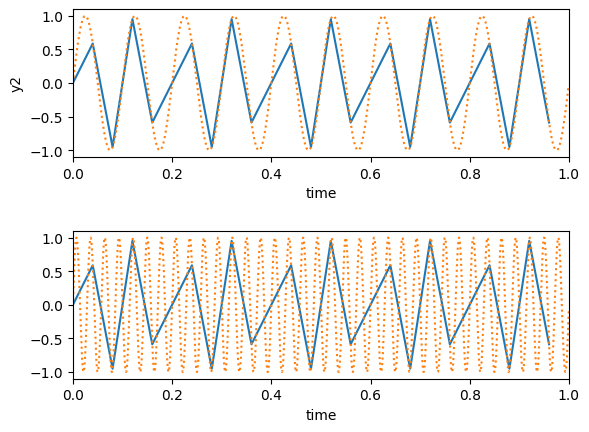

In [22]:
f1 = 10 # Hz
f2 = 35 # Hz
fs = 25 # Hz   (later change it to 75)
t0 = 0
t1 = 1
x = torch.arange(t0, t1, 1/fs)  # sample every 20th of a secon (20 Hz) for 10 seconds
y1 = torch.sin(2*math.pi*f1*x)
y2 = torch.sin(2*math.pi*f2*x)

xd = torch.arange(t0, t1, 1/(100*fs) )
yd1 = torch.sin(2*math.pi*f1*xd)
yd2 = torch.sin(2*math.pi*f2*xd)


fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)


ax1.plot(x, y1)
ax1.plot(xd, yd1, ":")
ax1.set_xlim(t0, t1)
ax1.set_xlabel('time')
ax1.set_ylabel('y1')

ax2.plot(x, y2)
ax2.plot(xd, yd2, ":")
ax2.set_xlim(t0, t1)
ax2.set_xlabel('time')
ax1.set_ylabel('y2')


Text(0, 0.5, 'z2')

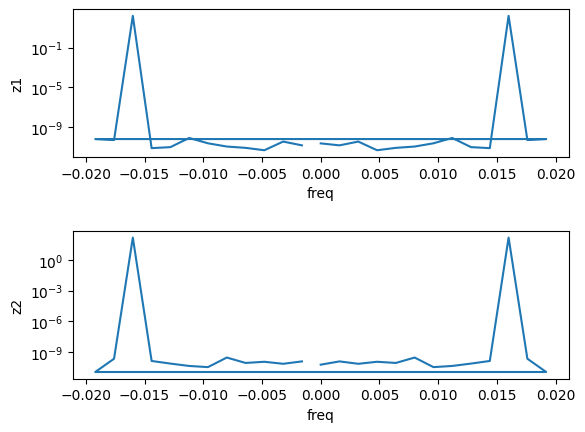

In [23]:
z1 = fft.fft(y1)  # rfft knows that the input is real, otherwise use fft
z2 = fft.fft(y2)
n = y1.size(dim=0)
f = fft.fftfreq(n, fs)

fig, (ax1, ax2) = plt.subplots(2, 1)
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

ax1.semilogy( f, abs(z1) ** 2)
ax1.set_xlabel('freq')
ax1.set_ylabel('z1')

ax2.semilogy( f, abs(z2) ** 2)
ax2.set_xlabel('freq')
ax2.set_ylabel('z2')


Text(0, 0.5, 'y2')

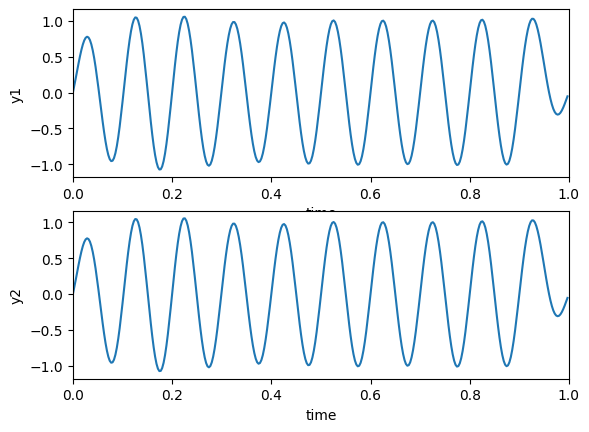

In [24]:
fs2 = 10.0 * f2
t2 = torch.arange( 0.0, 1.0, 1.0/fs2 )
m = t2.size(dim=0)
y1_interp = torch.zeros(m)
y2_interp = torch.zeros(m)
for i in range(0, n-1):
  y1_interp += y1[i] * torch.sinc( fs*t2 - i )
  y2_interp += y2[i] * torch.sinc( fs*t2 - i )

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot( t2, y1_interp)
ax1.set_xlim(t0, t1)
ax1.set_xlabel('time')
ax1.set_ylabel('y1')

ax2.plot( t2, y2_interp)
ax2.set_xlim(t0, t1)
ax2.set_xlabel('time')
ax2.set_ylabel('y2')
